In [1]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan,pi,exp
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9, 9]

In [3]:
data_files = glob('data_crop*.nc')
coordx = [258,260]
coordy = [63,65]
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_benchmark_fractions(data_files,data.index,thresh)
fr = [fr15,fr30,fr45,fr60]

data_crop_04_02.nc
data_crop_04_05.nc
data_crop_04_09.nc
data_crop_04_10.nc
data_crop_04_11.nc
data_crop_04_12.nc
data_crop_04_15.nc
data_crop_04_18.nc
data_crop_04_19.nc
data_crop_04_20.nc
data_crop_04_21.nc
data_crop_04_22.nc
data_crop_04_25.nc
data_crop_04_26.nc
data_crop_05_05.nc
data_crop_05_06.nc
data_crop_05_07.nc
data_crop_05_08.nc
data_crop_05_09.nc
data_crop_05_19.nc
data_crop_05_20.nc
data_crop_05_21.nc
data_crop_05_22.nc
data_crop_05_23.nc
data_crop_05_24.nc
data_crop_05_25.nc
data_crop_05_29.nc
data_crop_05_30.nc
data_crop_06_03.nc
data_crop_06_10.nc
data_crop_06_11.nc
data_crop_06_12.nc
data_crop_06_14.nc
data_crop_06_15.nc
data_crop_06_16.nc
data_crop_06_17.nc
data_crop_06_18.nc
data_crop_06_19.nc
data_crop_06_22.nc


In [26]:
data_bin = data.mask(data<thresh,other=1)
data_bin = data_bin.mask(data_bin!=1.0,other=0)
print(len(data.index))
print(len(fr15.index))

840
1008


In [23]:
coord=0
ytrue = data_bin.values[:,coord]

yprob15 = fr15.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob30 = fr30.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob45 = fr45.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob60 = fr60.loc[data_bin.index.values].values[:,0].astype(np.float)

valid15 = [i for i in range(len(yprob15)) if not np.isnan(yprob15[i])]
valid30 = [i for i in range(len(yprob30)) if not np.isnan(yprob30[i])]
valid45 = [i for i in range(len(yprob45)) if not np.isnan(yprob45[i])]
valid60 = [i for i in range(len(yprob60)) if not np.isnan(yprob60[i])]

ptrue15,ppred15 = calibration_curve(ytrue[valid15],yprob15[valid15])
ptrue30,ppred30 = calibration_curve(ytrue[valid30],yprob30[valid30])
ptrue45,ppred45 = calibration_curve(ytrue[valid45],yprob45[valid45])
ptrue60,ppred60 = calibration_curve(ytrue[valid60],yprob60[valid60])

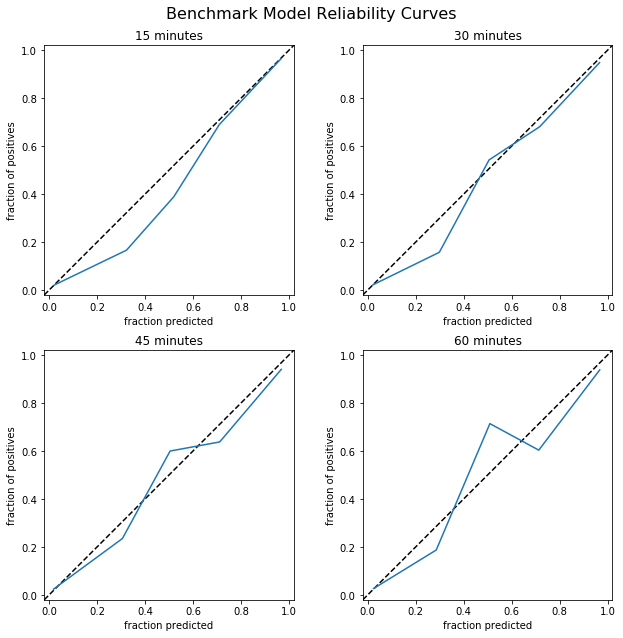

In [24]:
#coord = 0
xmin = -0.02
ymin = xmin
xmax = 1.02
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',ls='--')
        axarr[r,c].set_xlabel("fraction predicted")
        axarr[r,c].set_ylabel("fraction of positives")

axarr[0,0].plot(ppred15,ptrue15)
axarr[0,1].plot(ppred30,ptrue30)
axarr[1,0].plot(ppred45,ptrue45)
axarr[1,1].plot(ppred60,ptrue60)

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.tight_layout()
fig.suptitle("Benchmark Model Reliability Curves",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

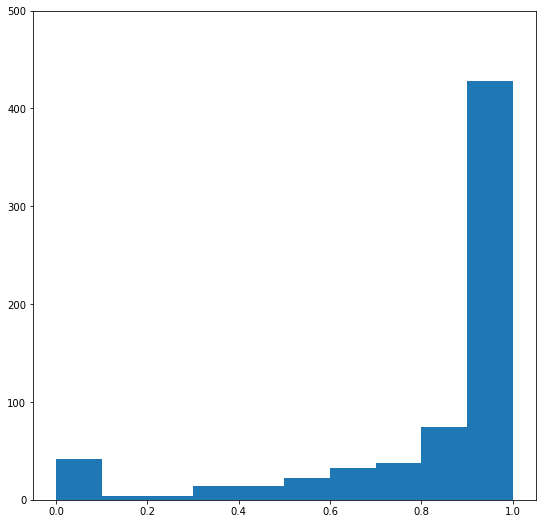

In [25]:
plt.hist(yprob15[valid15])
plt.ylim([0,500])
plt.show()